<a href="https://colab.research.google.com/github/samiaaaah/IIIT-assignments/blob/main/AIML_III_Module_2_project_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Project

---

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

we wil be performing a simple Exploratory Data Anaysis for this project. We will use the methods we learned in the tutorials to have a basic understanding of the dataset. So first we will start with the heart dataset available from kaggle. the infomration about the columns of the dataset is given below:    
-age    
-sex    
-chest pain type (4 values)    
-resting blood pressure    
-serum cholestoral in mg/dl    
-fasting blood sugar > 120 mg/dl    
-resting electrocardiographic results (values 0,1,2)    
-maximum heart rate achieved    
-exercise induced angina   
-oldpeak = ST depression induced by exercise relative to rest    
-the slope of the peak exercise ST segment    
-number of major vessels (0-3) colored by flourosopy    
-:thal: 0 = normal; 1 = fixed defect; 2 = reversable defect    

Fill in the portions that says "to do"

In [ ]:
from google.colab import files
uploaded1 = files.upload()

In [ ]:
data = pd.read_csv("heart.csv")
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'heart.csv'

In [ ]:
data.shape

In [ ]:
data.columns


Data preparation

In [ ]:
## we will be comparing rest of the parameters/columns present in the data with respect to precence or absece of heart disease
data['target'] = data.target.replace({1: "Disease", 0: "No_disease"})
data['sex'] = data.sex.replace({1: "Male", 0: "Female"})
data['cp'] = data.cp.replace({1: "typical_angina",
                          2: "atypical_angina",
                          3:"non-anginal pain",
                          4: "asymtomatic"})
data['exang'] = data.exang.replace({1: "Yes", 0: "No"})
data['slope'] = data.cp.replace({1: "upsloping",
                          2: "flat",
                          3:"downsloping"})
data['thal'] = data.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

In [ ]:
data.head()

First, lets look at the difference in the number of samples with and without disease using a barplot.

In [ ]:
sns.barplot(data['target'].value_counts())
plt.title('Heart Disease Classes')
plt.show()

In [ ]:
## we can plot the same barplots usng the pandas inbuilt plotting functions.
data['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes')

In [ ]:
## Now plot a barplot indicating the the sex of the participants involved in the study, use whatever method of ploting comfortable for you
## to do
data['target'].value_counts().plot(kind='hist').set_title('Heart Disease Classes')

In [ ]:
## pie charts can also be used to show the same infomation in a different manner
plt.pie(data['target'].value_counts(), labels=["Disease", "No disease"], autopct='%1.1f%%')
plt.title('Target Labels')
plt.show()

In [ ]:
# next we will plot the counts of all the non-continous features present in the dataset.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    sns.barplot(data[feature].value_counts(), ax=ax)

In [ ]:
##  now lets play with 2 vaiables in dataset. Lets see if chest pain translates to the presence of desease in most cases...
sns.countplot(x='cp', hue='target', data=data, palette='rainbow').set_title('Disease classes according to Chest Pain')

In [ ]:
# now lets visualise count of all vairables w.r.t the presence of disease togather:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    ## to do
    sns.countplot(x=feature, hue='target', data=data, ax=ax)
    ax.set_title(f'Count of {feature} by Target')

plt.tight_layout()
plt.show()

In [ ]:
# Visualising the distribution of the continous variables
cont_feat = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17,10))

# Loop through continuous features to create histograms and box plots
for idx, feature in enumerate(cont_feat):
    # Histogram
    ax_hist = axes[int(idx/3), idx%3]
    sns.histplot(data[feature], kde=True, ax=ax_hist)
    ax_hist.set_title(f'Distribution of {feature}')

    # Box plot
    if idx == len(cont_feat) - 1:
        ax_box = axes[int((idx+1)/3), (idx+1)%3]
        sns.boxplot(x=data[feature], ax=ax_box)
        ax_box.set_title(f'Box plot of {feature}')

plt.tight_layout()
plt.show()

In [ ]:
## pair plots can automoaticaly be used to viwe the pairwise relationship between all the  feature that we selected
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']
sns.pairplot(data[continous_features + ['target']], hue='target')

In [ ]:
# Now lets try to understand the relationship between age and chol in each of the target based on sex.
sns.lmplot(x="age", y="chol", hue="sex", col="target",
           palette="Set1",
           data=data)
plt.show()

In [ ]:
numeric_data = data[continous_features]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True)


plt.show()

In [ ]:
fig, axes = plt.subplots(1, len(continous_features), figsize=(25, 4), sharex=False, sharey=False)

for idx, feature in enumerate(continous_features):
    sns.boxplot(x='target', y=feature, data=data, ax=axes[idx])
plt.tight_layout()
plt.show()

In [ ]:
# prompt: plot the cumulative variace of pca for all the possibel pronviopal components
## to do
import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
pca.fit(numeric_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


In [ ]:
pca = PCA(n_components=2)
pca.fit(numeric_data)
pca_data = pca.transform(numeric_data)

# Create a DataFrame with the principal components and target labels
pca_df = pd.DataFrame({
    "pca_1": pca_data[:, 0],
    "pca_2": pca_data[:, 1],
    "target": data["target"]
})

# Visualize the PCA results with a scatter plot
sns.scatterplot(x="pca_1", y="pca_2", hue="target", data=pca_df)
plt.title("PCA Visualization of Heart Disease Data")
plt.show()


In [ ]:
from sklearn.manifold import TSNE

# Initialize and fit the TSNE model
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(numeric_data)

# Create a DataFrame with the TSNE components and target labels
tsne_df = pd.DataFrame({
    "tsne_1": tsne_data[:, 0],
    "tsne_2": tsne_data[:, 1],
    "target": data["target"]
})

# Visualize the TSNE results with a scatter plot
sns.scatterplot(x="tsne_1", y="tsne_2", hue="target", data=tsne_df)
plt.title("TSNE Visualization of Heart Disease Data")
plt.show()


Based on the plots above, answer the following questions:    
1. What is the percentage of Samples with Disease?    54.46%
2. what are the 3 continous features that shows a singnficanct statistical differnce in distribution with respect to the precence and absence of the disease?  Age

Maximum heart rate achieved (thalach)

ST depression induced by exercise relative to rest (oldpeak)  
3. Can we see a clear seperation in terms of the presence/absence of disease in the features obtained from pca and tsne plots?    NO
4. What is the optimal number of principal components in our case?  by identifying elbow point  
5. what are the continous features with the highest correation with each other?Age and Resting blood pressure (trestbps)

Now lets move on to do the same analysis on the starbucks nutrition dataset. this dataset contains the nutrition information of starbucks drinks.

In [ ]:
upload2 = files.upload()

Saving star_nutri_expanded.csv to star_nutri_expanded.csv


In [ ]:
data = pd.read_csv("star_nutri_expanded.csv")

In [ ]:
data.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


cleaning and filling the missing values in the data

In [ ]:
data['Caffeine (mg)'] = data['Caffeine (mg)'].replace('Varies', np.NaN).replace('varies', np.NaN)
data['Caffeine (mg)'] = data['Caffeine (mg)'].astype(np.float64)
data['Caffeine (mg)'] = data['Caffeine (mg)'].fillna(data['Caffeine (mg)'].mean())

In [ ]:
data['Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [ ]:
data['Total Fat (g)'] = data['Total Fat (g)'].replace('3 2', '3.2')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

In [ ]:
# Extract columns with int and float types
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Print the numeric columns
print(numeric_columns)


Index(['Calories', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Caffeine (mg)'],
      dtype='object')


We will be analysing the dataset using the fact that weather the drink comes under the category tea or not

In [ ]:
data['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [ ]:
data['Tea'] = data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)
data = data.drop('Beverage_category', axis=1)

In [ ]:
##  one hot encoding of categorical features in data
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [ ]:
data = onehot_encode(
    data,
    columns=['Beverage', 'Beverage_prep'],
    prefixes=['bev', 'bevp']
)

In [ ]:

data = data.replace({True: 1, False: 0})


In [ ]:
data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))

<ipython-input-25-4d863302f14a>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))


In [ ]:
data.head()

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),...,bevp_Grande Nonfat Milk,bevp_Short,bevp_Short Nonfat Milk,bevp_Solo,bevp_Soymilk,bevp_Tall,bevp_Tall Nonfat Milk,bevp_Venti,bevp_Venti Nonfat Milk,bevp_Whole Milk
0,3.0,0.1,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,70.0,0.1,0.1,0.0,5.0,75.0,10.0,0.0,9.0,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 62 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Calories                                                 242 non-null    float64
 1   Total Fat (g)                                            242 non-null    float64
 2   Trans Fat (g)                                            242 non-null    float64
 3   Saturated Fat (g)                                        242 non-null    float64
 4   Sodium (mg)                                              242 non-null    float64
 5   Total Carbohydrates (g)                                  242 non-null    float64
 6   Cholesterol (mg)                                         242 non-null    float64
 7   Dietary Fibre (g)                                        242 non-null    float64
 8   Sugars (g)                    

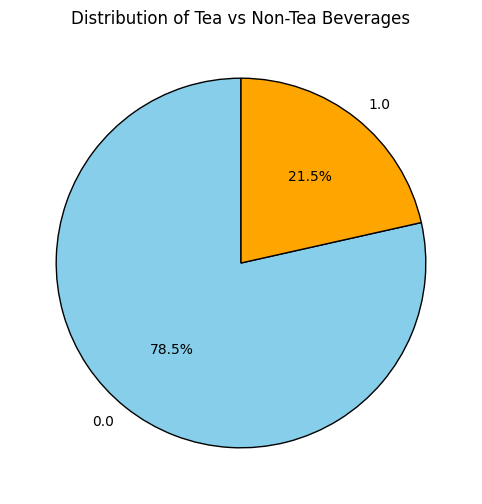

Tea
0.0    190
1.0     52
Name: count, dtype: int64


In [ ]:
tea_counts = data['Tea'].value_counts()


plt.figure(figsize=(8, 6))
tea_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'], wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Tea vs Non-Tea Beverages')
plt.ylabel('')
plt.show()


print(tea_counts)

Observations from the Pie Chart
Distribution: The pie chart will show the percentage of tea versus non-tea beverages in the dataset.
Insights: By looking at the distribution, you can understand how many of the beverages are tea-based compared to other types. If the majority are non-tea beverages, it indicates that the dataset is more focused on other types of drinks.

In [ ]:
print(data.columns)

Index(['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)',
       'Sodium (mg)', 'Total Carbohydrates (g)', 'Cholesterol (mg)',
       'Dietary Fibre (g)', 'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)',
       'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)',
       'Tea', 'bev_Banana Chocolate Smoothie', 'bev_Brewed Coffee',
       'bev_Caffè Americano', 'bev_Caffè Latte',
       'bev_Caffè Mocha (Without Whipped Cream)', 'bev_Cappuccino',
       'bev_Caramel', 'bev_Caramel (Without Whipped Cream)',
       'bev_Caramel Apple Spice (Without Whipped Cream)',
       'bev_Caramel Macchiato', 'bev_Coffee', 'bev_Espresso',
       'bev_Hot Chocolate (Without Whipped Cream)',
       'bev_Iced Brewed Coffee (With Classic Syrup)',
       'bev_Iced Brewed Coffee (With Milk & Classic Syrup)', 'bev_Java Chip',
       'bev_Java Chip (Without Whipped Cream)', 'bev_Mocha',
       'bev_Mocha (Without Whipped Cream)', 'bev_Orange Mango Banana Smoothie',
       'bev_

<ipython-input-33-07dcfd3c3ea5>:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))


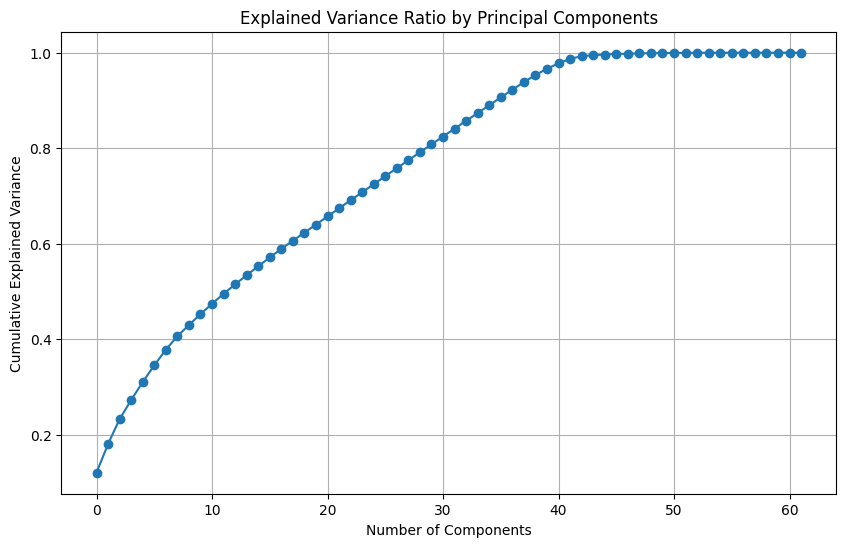

[0.12036744 0.18046187 0.23277685 0.27247999 0.31037574 0.34509517
 0.37800075 0.40626652 0.4297095  0.45241483 0.47411813 0.49506443
 0.51476654 0.53405309 0.55268546 0.57127204 0.58914512 0.60617625
 0.62316699 0.64014154 0.65710728 0.6740577  0.69098384 0.70783817
 0.72465431 0.74144331 0.75821795 0.77486845 0.79147853 0.80802291
 0.82451196 0.84091978 0.85730301 0.87363853 0.88997304 0.90629387
 0.92249339 0.93819558 0.95324197 0.96649771 0.97769212 0.98715159
 0.9926659  0.99482108 0.99624323 0.99735614 0.99804906 0.99861432
 0.99902689 0.9993149  0.99954987 0.99975566 0.99986959 0.99993658
 0.99998019 0.99999594 1.         1.         1.         1.
 1.         1.        ]
Optimal number of principal components: 39


In [ ]:
## to do
# perform pca on the data and plot the explained variace ratio, what is the optimal number of principal components in this case ?

# One-hot encode categorical features
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

categorical_columns = []  # Assuming no additional categorical columns need encoding
prefixes = []

data = onehot_encode(data, columns=categorical_columns, prefixes=prefixes)
data = data.replace({True: 1, False: 0})
data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply PCA
pca = PCA()
pca.fit(data_scaled)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio by Principal Components')
plt.grid()
plt.show()

# Print the explained variance ratio for each component
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
print(explained_variance_ratio)

# Determine the optimal number of principal components
optimal_components = np.argmax(explained_variance_ratio >= 0.95) + 1
print(f'Optimal number of principal components: {optimal_components}')



<ipython-input-34-50d8c8d7f161>:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))


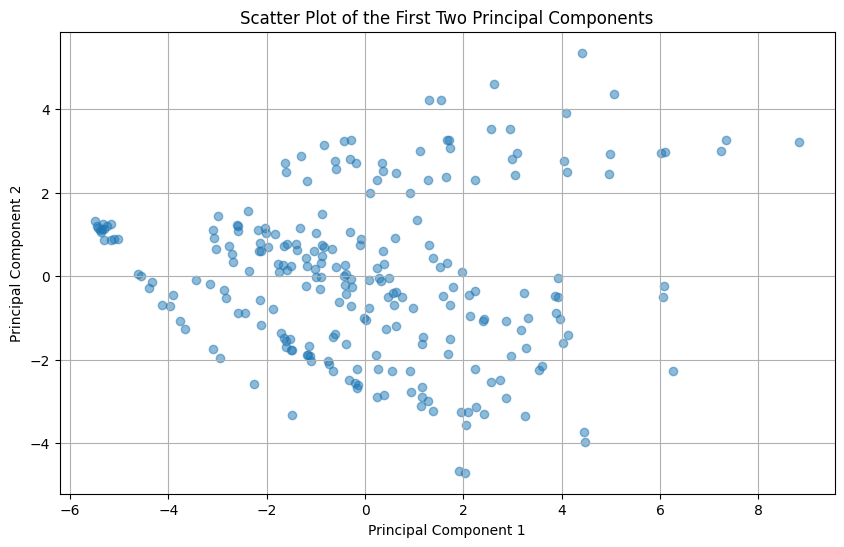

Explained variance by the first two principal components: [0.12036744 0.06009442]


In [ ]:
## to do
# visualise the principal components, choose the number of principal components based on the above plot. What is you observation from the plot?
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

categorical_columns = []  # Assuming no additional categorical columns need encoding
prefixes = []

data = onehot_encode(data, columns=categorical_columns, prefixes=prefixes)
data = data.replace({True: 1, False: 0})
data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply PCA
pca = PCA(n_components=2)  # Choose the number of components based on the explained variance plot
data_pca = pca.fit_transform(data_scaled)

# Create a scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of the First Two Principal Components')
plt.grid()
plt.show()

# Print the explained variance ratio for the first two components
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Explained variance by the first two principal components: {explained_variance_ratio}')

the optimal number of principal components in this case is likely four

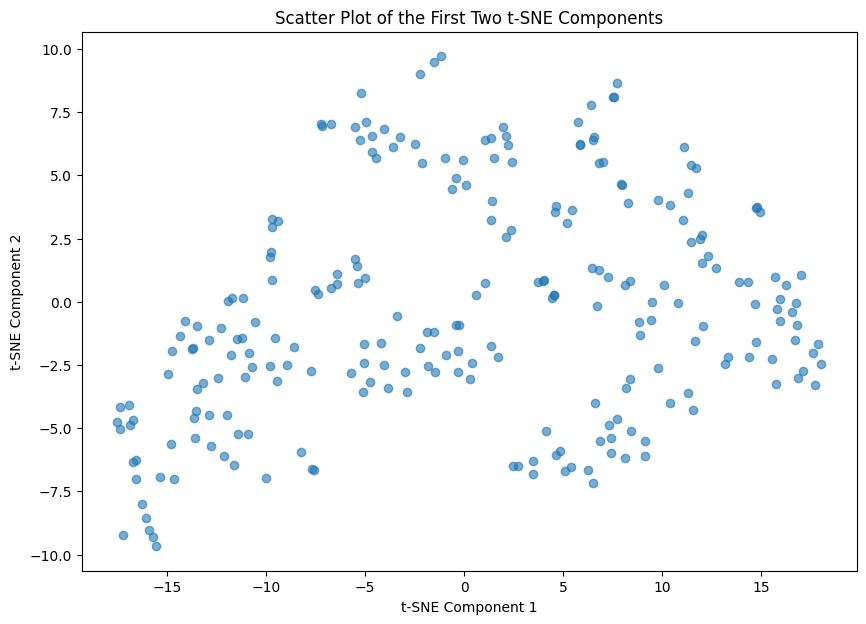

In [ ]:
## to do
# plot the first 2 components of tsne, whats you observation from the plot?
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=0)
tsne_components = tsne.fit_transform(data)

# Plot the first 2 components of t-SNE
plt.figure(figsize=(10, 7))
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], alpha=0.6)
plt.title('Scatter Plot of the First Two t-SNE Components')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


In [ ]:
## to do
# create a correlation matrix and plot the heatmap, whats your observation from the heatmap ?


In [ ]:
## to do
# make a boxplot of all the numeric columns of the dataset. Which column/columns can be the most potential indicator weather its a tea or a non tea drink?


To enhance the clarity and professionalism of the provided text, consider the following refined version: In the process of conducting a preliminary Exploratory Data Analysis (EDA), we have utilized various techniques to gain insights into the datasets under consideration. It's important to note that our analysis extends beyond the initial visualizations, embracing a multitude of methods to thoroughly understand the data.
Among the array of tools available for EDA, one particularly easy solution is the use of the pandas profiling library. This tool significantly simplifies the process of exploring the fundamental distribution of data within a dataset. By generating detailed profile reports, pandas profiling provides a comprehensive overview of the dataset's characteristics, including but not limited to, the distribution of variables, presence of missing values, and potential correlations between variables.
Furthermore, we are utilizing Google Colab notebooks, the integration of AI tools offers an additional avenue for data visualization and analysis. These tools can automatically generate insightful plots and statistics, further enriching the data exploration process.